In [1]:
import sys
from pathlib import Path
import json

import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.providers.aer import StatevectorSimulator
from qiskit.circuit.library import ZZFeatureMap
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.tensorboard import SummaryWriter
from pandas import DataFrame

sys.path.extend(['/home/quic/QUIC-Projects/'])
from classifiers.quantum.qml.qasvm import PseudoTensorSoftQASVM
from classifiers.datasets.sklearn import SklearnDataset
from classifiers.quantum.ansatz import MultilayerCircuit9FeatureMap
from classifiers.convex.svm import CvxSoftQASVM

In [2]:
# simulation setting
dir_name = 'numerical_simulation_gpu2'
n_params_per_layer = 1

In [14]:
from operator import index
from pandas import read_csv
dir_path = Path.cwd() / dir_name
if dir_path.joinpath('epsilon_summary').exists():
    epsilon_summary = read_csv(dir_path.joinpath('epsilon_summary'), index_col=0)
    epsilon_summary.columns = epsilon_summary.columns.astype(int)
epsilon_summary

,6,7,8,9,10,11,12,13
1,7.507519e-03,0.008751,0.006580,0.006503,0.006423,0.010781,0.007987,0.0
3,3.952619e-03,0.004394,0.004626,0.004659,0.005132,0.005828,0.006210,0.0
5,2.327371e-03,0.002571,0.002130,0.002422,0.003492,0.004699,0.004538,0.0
7,1.395178e-03,0.001641,0.002732,0.002041,0.003027,0.004463,0.004520,0.0
9,7.163817e-04,0.001132,0.001516,0.002631,0.002093,0.002669,0.003562,0.0
11,2.856990e-04,0.000993,0.001146,0.001777,0.002284,0.003329,0.003735,0.0
13,3.249336e-05,0.000639,0.001264,0.001275,0.002776,0.002753,0.003031,0.0
15,4.250563e-05,0.000424,0.000918,0.001083,0.002001,0.003328,0.002908,0.0
17,6.137400e-06,0.000166,0.000838,0.000978,0.001318,0.002550,0.000000,0.0
19,1.509496e-08,0.000040,0.000652,0.001139,0.001285,0.002036,0.000000,0.0


In [15]:
epsilon_summary.columns

Int64Index([6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [53]:
from pandas import read_csv
dir_path = Path.cwd() / dir_name
epsilon_summary = read_csv(dir_path/'epsilon_summary')
delta_summary = read_csv(dir_path/'delta_summary')
accuracy_summary = read_csv(dir_path/'accuracy_summary')

n_layers_list = np.array(epsilon_summary[epsilon_summary.columns[0]])
n_qubits_list = np.array(epsilon_summary.columns[1:]).astype(int)

epsilon_summary = epsilon_summary[epsilon_summary.columns[1:]]
epsilon_summary.index = n_layers_list
delta_summary = delta_summary[delta_summary.columns[1:]]
delta_summary.index = n_layers_list
accuracy_summary = accuracy_summary[accuracy_summary.columns[1:]]
accuracy_summary.index = n_layers_list

In [62]:
from itertools import product
df = []
for n_layer, n_qubits in product(n_layers_list, n_qubits_list):
    df.append(
        DataFrame(
            dict(
                n_qubits=n_qubits, 
                n_layers=n_layer, 
                epsilon=epsilon_summary.loc[n_layer, str(n_qubits)], 
                delta=delta_summary.loc[n_layer, str(n_qubits)], 
                accuracy=accuracy_summary.loc[n_layer, str(n_qubits)]
            ), index=[0]
        )
    )
df = concat(df, ignore_index=True)

<AxesSubplot:xlabel='n_layers', ylabel='epsilon'>

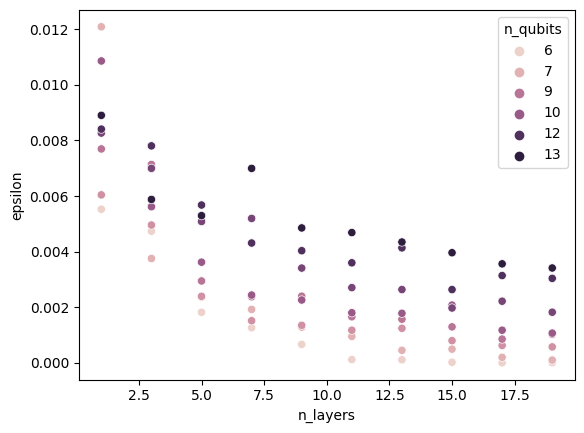

In [66]:
import seaborn as sns
sns.scatterplot(df, x='n_layers', y='epsilon', hue='n_qubits')

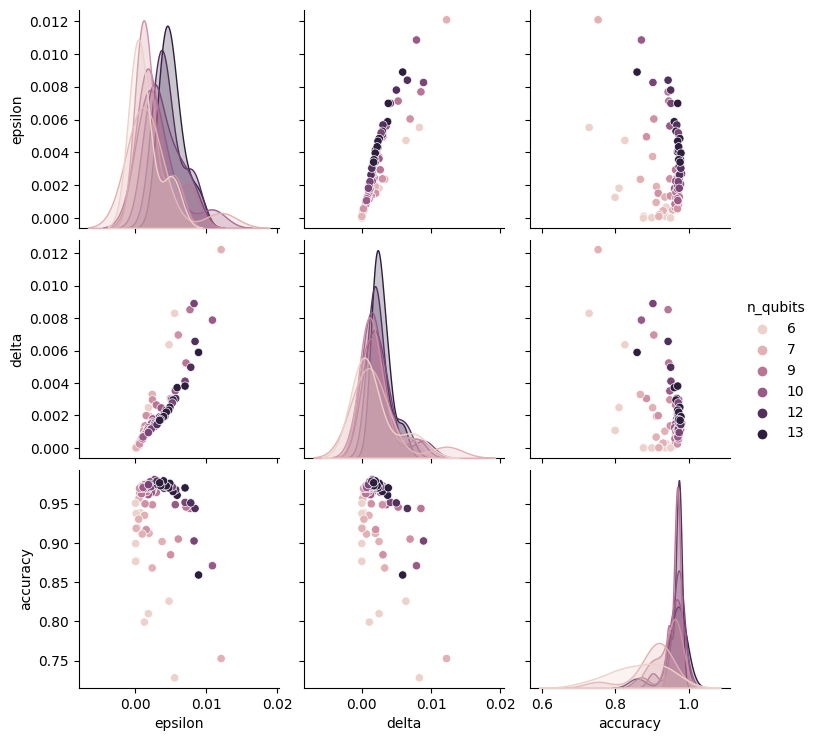

In [69]:
sns.pairplot(df, vars=['epsilon', 'delta', 'accuracy'], hue='n_qubits')